In [1]:
#Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#Fonction qui calcule les contraintes gi(ω)
def contrainte(x, y, w, i):
    g = - y[i] * (np.dot(w[:2], x[i]) - w[-1]) + 1
    return g


In [3]:

#Fonction qui calcule les paramètres ω et λ
def parameters(x, y):
    lamda = np.array([0.1] * x.shape[0])
    pas = 0.0005
    eps = 1e-5
    i = 0
    while(i < 70000):
        w = np.zeros(3)
        gather = lamda.copy()
        Margin = []
        L = []
        #Détermination de ω1 et ω2
        w[:2] = np.dot(y * lamda, x)
        #Détermination des points sur les vecteurs supports tels que λ > 0
        for l in range(x.shape[0]):
            if gather[l] > 0:
                Margin.append(x[l])
        #Détermination de ω3
        if Margin != []:
            for m in Margin:
                w[-1] += np.dot(m, w[:2])
            w[-1] /= len(Margin)
        #Calcul des contraintes gi(ω) pour chaque individu
        for j in range(len(x)):
            L.append(contrainte(x, y, w, j))
        g = np.array(L)
        #Calcul de λ selon la méthode d'Uzawa
        lamda += pas * g
        for j in range(lamda.shape[0]):
            if lamda[j] < 0:
                lamda[j] = 0

        if np.linalg.norm(lamda - gather, 2) < eps:
           return w
        i += 1
    return w

In [16]:

#Fonction qui représente graphiquement la solution
def show(x, w):
    w = w.tolist()
    #X est l'axe des abscisses et y est l'axe des ordonnées
    X = x[:, 0]
    y = x[:, 1]
    #Détermination des 3 droites à dessiner : D0, D1 et D-1 
    d0 = (- w[0] * X + w[2]) / w[1]
    d1 = (- w[0] * X + w[2] + 1) / w[1]
    d_1 = (- w[0] * X + w[2] - 1) / w[1]
    plt.title("Support Vector Machine")
    plt.xlabel('Taille(m)')
    plt.ylabel('Poids(Kg)')
    plt.scatter(X, y, marker="o", label = 'Individu', color = 'saddlebrown')
    plt.plot(X, d0, label='D0', linestyle='dashed', color = 'red')
    plt.plot(X, d1, label='D1', color = 'darkblue')
    plt.plot(X, d_1, label='D-1', color = 'yellow')
    plt.legend()
    plt.grid()
    plt.show()

In [17]:
#Génération des données de test
individu = np.array([[1.5, 72], [1.6, 77], [1.65, 80], [1.75, 92], [1.6, 60], [1.83, 69], [1.7, 65], [1.8, 72]])
classification = np.array([1, 1, 1, 1, -1, -1, -1, -1])
for i in range(12):
    data = [random.uniform(1.5, 2.0), random.uniform(50, 100)]
    individu = np.concatenate((individu, np.array([data])))
    imc = data[1] / data[0] ** 2
    if imc < 24.9:
        classification = np.concatenate((classification, np.array([-1])))
    else:
        classification = np.concatenate((classification, np.array([1])))

In [18]:

#Test de la fonction qui calcule les paramètres ω et λ
W = parameters(individu, classification)

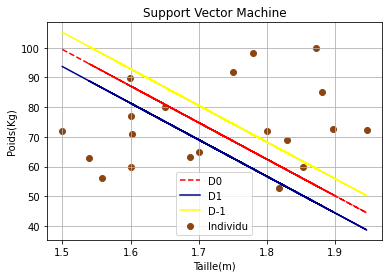

In [19]:
#Test de la fonction qui génère la représentation graphique
show(individu, W)